In [2]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [3]:

# Importing dataset 
wifi=pd.read_csv('trainingData.csv',header=0,delimiter=',')
validate=pd.read_csv('validationData.csv',header=0,delimiter=',')
# Check the structure of the data after it's loaded 
# (Print the number of rows and columns)
num_rows,num_cols=wifi.shape
print('Number of columns:{}'.format(num_cols))
print('Number of rows:{}'.format(num_rows))

Number of columns:529
Number of rows:19937


In [6]:
# Check the statistics of the data per columns 
wifi.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [4]:
# check the columns names 
col_names=wifi.columns.values
# col_names (have a look of column value)
# Check for the mssing values
missing_values_count= wifi.isnull().sum()
# missing_values_count(have a look of missing value) 
# how many total missing values do we have ? 
total_cells=np.product(wifi.shape)
total_missing=missing_values_count.sum()
# Percentage of data that is missing 
missing_percentage=(total_missing/total_cells)*100
print('Percentage of missing data ={}'.format(missing_percentage))



Percentage of missing data =0.0


In [5]:
# Assess unique values per building columns
unique_floors=wifi['FLOOR'].unique()
unique_bldgs = wifi["BUILDINGID"].unique()
unique_spaceid = wifi["SPACEID"].unique()
unique_rpos = wifi["RELATIVEPOSITION"].unique()
unique_users = wifi["USERID"].unique()
print('Unique Floors : {}'.format(unique_floors))
print('Unique Buildings : {}'.format(unique_bldgs))
print('Unique Space IDs : {}'.format(unique_spaceid))
print('Unique Relative Positions : {}'.format(unique_rpos))
print('Unique Users : {}'.format(unique_users))

Unique Floors : [2 0 3 4 1]
Unique Buildings : [1 0 2]
Unique Space IDs : [106 103 102 122 105 101 112 104 110 108 109 111 107  15  29 117  16  28
  22  10   2   4   3   5   6   9  27   8   7  26  18 216  17 217 247 248
 246 245 244 243 242 241 240 201 202 204 203 205 207 206 209 211 208 210
 212 214 213 215 121 219 221 222 218 220 250 223 225 224 229 226 227 228
 233 231 230 232 236 235 234 237 238 239 141 140 143 113 114 116 115 120
 118 128 119 129 125 124 131 127 132 126 133 134 137 135 136 253 254 123
 130 138 139 142 146 147 249 144   1  30  25  13  12  11  14]
Unique Relative Positions : [2 1]
Unique Users : [ 2 11  3  4  5  6  7  8  9 16 10 12 13 14 15  1 17 18]


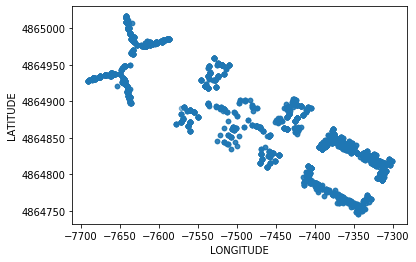

In [17]:
# Map the data 
wifi.plot(kind="scatter",x="LONGITUDE",y="LATITUDE",alpha=0.2)
plt.savefig('data_map.png')

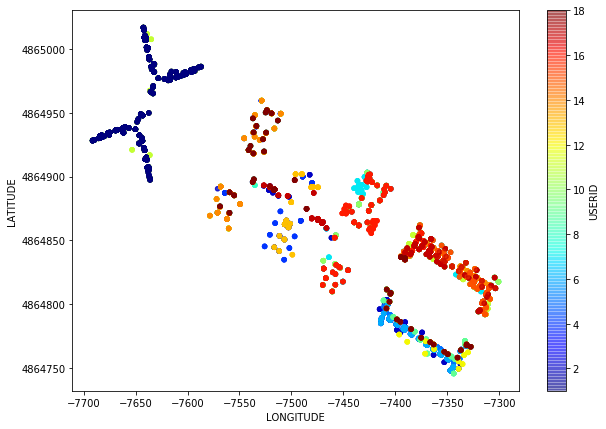

In [19]:
# Map the data by user ID 
# see how much of the information in each building was collected by how many users 
wifi.plot(kind="scatter",x="LONGITUDE",y="LATITUDE",alpha=0.4,figsize=(10,7),\
         c="USERID",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.savefig('user_map2.png')

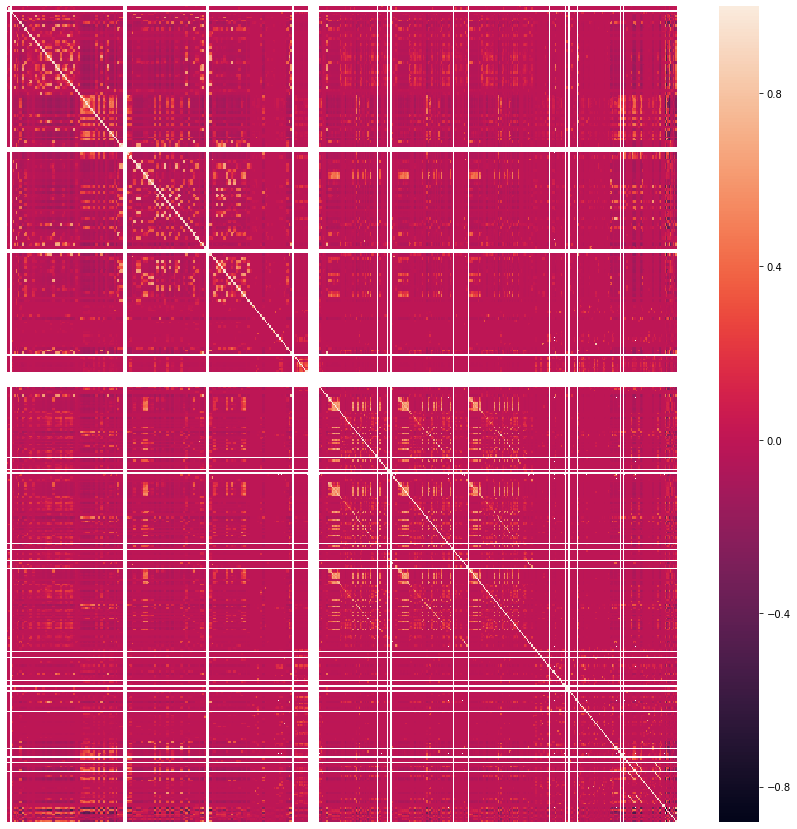

In [7]:
# plot the correlations between the WAP features
corr=wifi.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(corr,xticklabels=False,yticklabels=False)

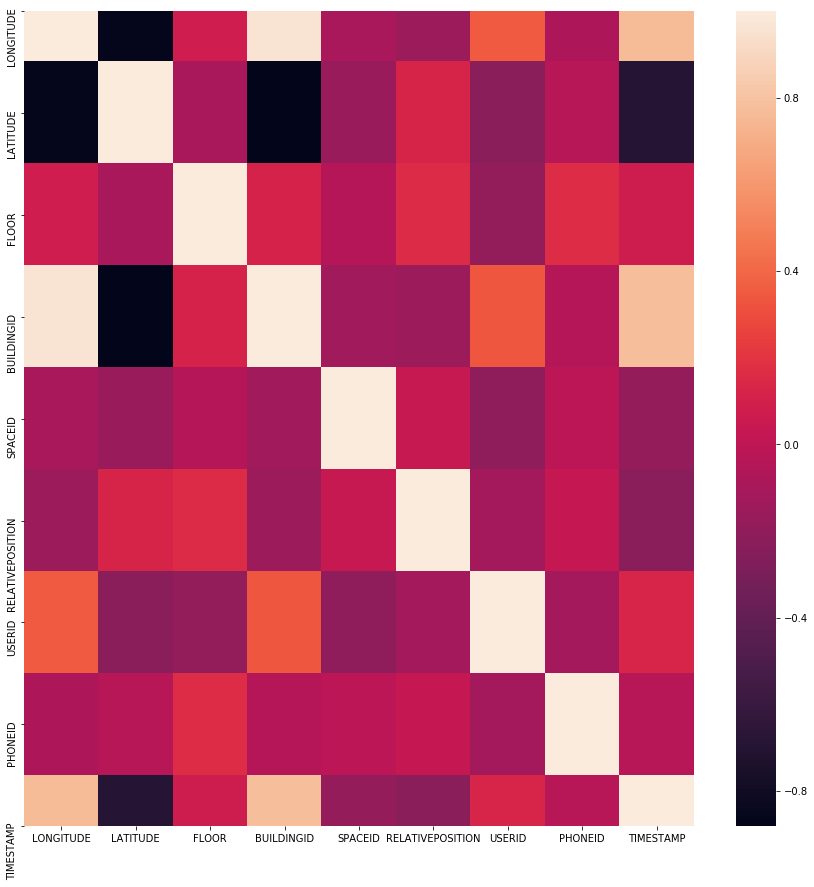

In [6]:
# plot the correlations of the attributes
attribute=wifi.iloc[:,520:529]
corr1=attribute.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(corr1)

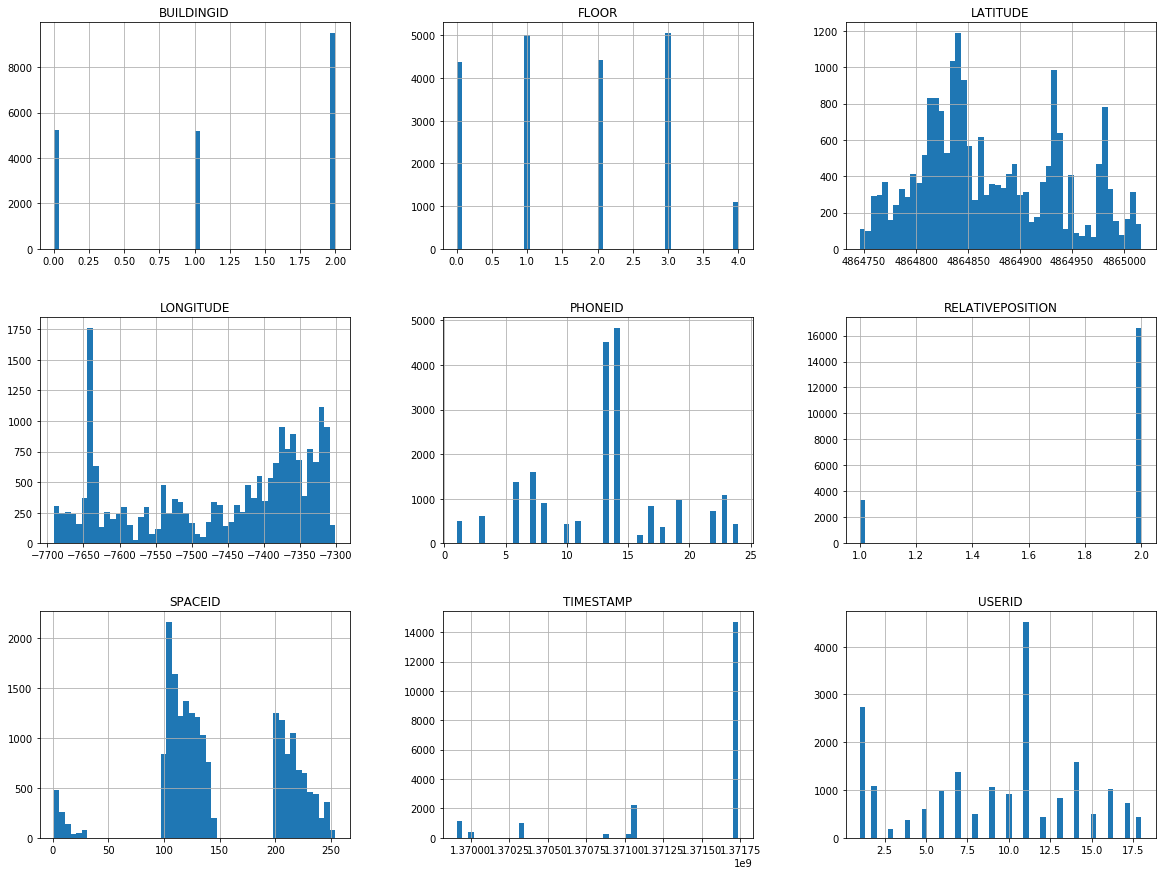

In [7]:
# Plot the histograms of the attributes
attribute.hist(bins=50,figsize=(20,15))
plt.savefig("Attribute_histogram_plot")
plt.show()

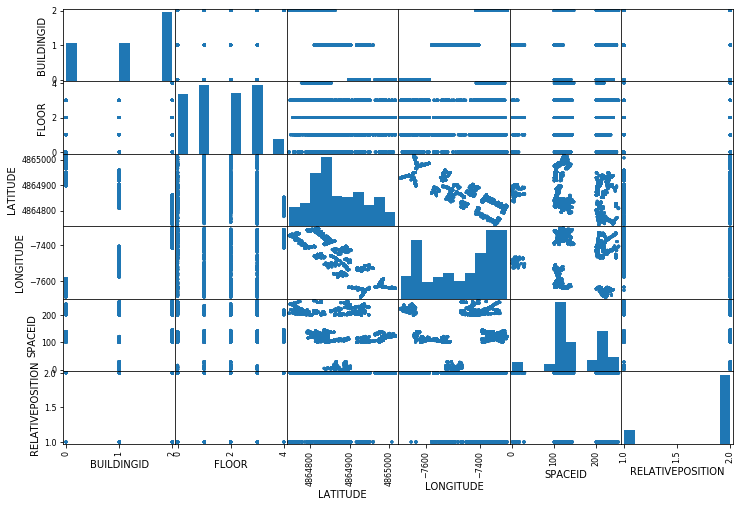

In [10]:
new_attributes = ["BUILDINGID","FLOOR", "LATITUDE", "LONGITUDE", "SPACEID", "RELATIVEPOSITION"]
scatter_matrix(wifi[new_attributes], figsize=(12, 8))
plt.savefig('matrix.png')